In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
c_ans_df = cancer["target"]
# save
total_df = cancer_df[:]
total_df["Ans"] = cancer["target"]
total_df.to_csv("/content/drive/MyDrive/data/breast_cancer.csv", index=False, encoding="utf-8")

<ipython-input-40-a31097e10a67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df["Ans"] = cancer["target"]


In [ ]:
import numpy as np 
from sklearn.model_selection import train_test_split
# 避免某些資料pandas有問題
cancer_np = np.array(cancer_df)
c_ans_np = np.array(c_ans_df)
x_train, x_test, y_train, y_test = train_test_split(cancer_np, c_ans_np, test_size =0.1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, sep="\n")

(512, 30)
(57, 30)
(512,)
(57,)


<AxesSubplot:>

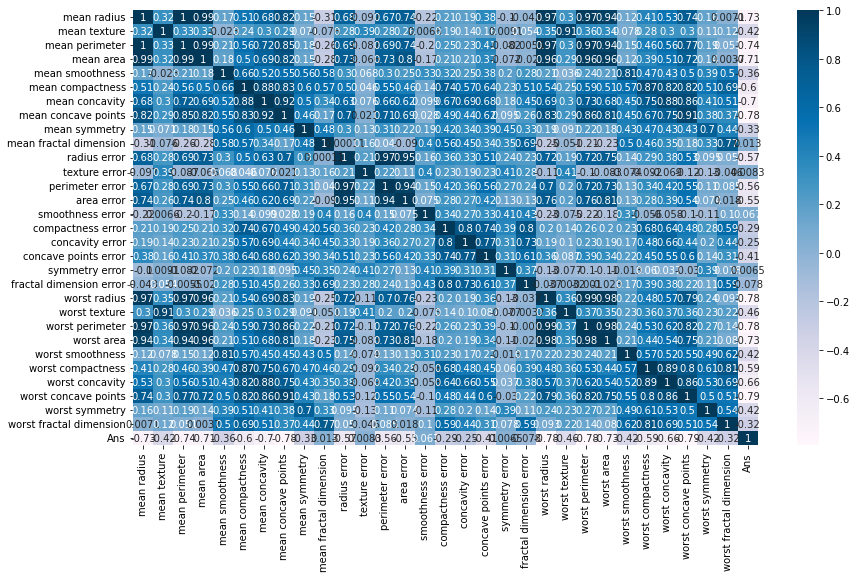

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(14, 8))
sns.heatmap(total_df.astype("float").corr(), cmap="PuBu", annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

p_dict = {
    "max_depth": range(4, 13),
    }
clf = DecisionTreeClassifier()
# p_dict 帶入參數 cv 交叉驗證份數
grid_s = GridSearchCV(clf, p_dict ,cv=10)
grid_s.fit(x_train, y_train)
print(grid_s.best_params_)
print(grid_s.best_score_)

{'max_depth': 5}
0.947209653092006


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

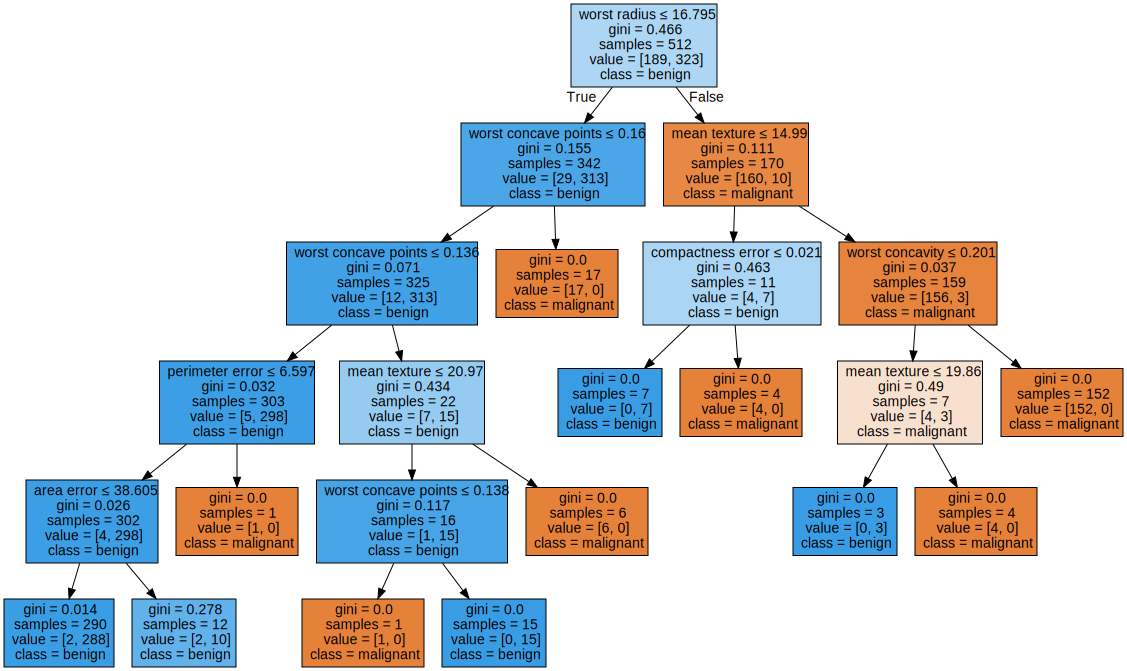

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf, out_file=None, feature_names=cancer["feature_names"],
                class_names=cancer["target_names"], filled=True, special_characters=True)
graph = graphviz.Source(g)
graph

In [ ]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
print("預測結果:", list(pre))
print("真正標籤", list(y_test))
print("正確率: ", accuracy_score(y_test, pre) * 100, "%")

預測結果: [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]
真正標籤 [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1]
正確率:  91.22807017543859 %


In [ ]:
# 排除稀少偏離值 可解釋性高